# Introduction to Classification in Machine Learning
Classification is a type of **supervised learning** where the goal is to predict discrete labels (categories). It is widely used in applications such as spam detection, medical diagnosis, and image recognition.

## 1. Importing Required Libraries
We'll use `numpy`, `pandas`, `matplotlib`, and `sklearn` for building a simple classification model.

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


## 2. Understanding Classification
In classification, the target variable (label) is categorical. For example:
- **Binary Classification:** Two classes (e.g., spam vs. not spam)
- **Multi-class Classification:** More than two classes (e.g., cat, dog, or bird)
Common algorithms used for classification include:
- Logistic Regression
- Support Vector Machines (SVM)
- Decision Trees & Random Forest
- k-Nearest Neighbors (k-NN)
- Neural Networks

## 3. Creating a Sample Classification Dataset
We'll generate a dataset using `numpy` with two classes.

In [2]:
# Generate synthetic classification data
np.random.seed(42)
X_class = np.random.randn(200, 2)  # Features
Y_class = (X_class[:, 0] + X_class[:, 1] > 0).astype(int)  # Labels (0 or 1)

# Convert to DataFrame
data_class = pd.DataFrame({'Feature1': X_class[:, 0], 'Feature2': X_class[:, 1], 'Label': Y_class})
data_class.head()

,Feature1,Feature2,Label
0,0.496714,-0.138264,1
1,0.647689,1.523030,1
2,-0.234153,-0.234137,0
3,1.579213,0.767435,1
4,-0.469474,0.542560,1


## 4. Visualizing the Dataset
Let's plot the dataset to understand the class distribution.

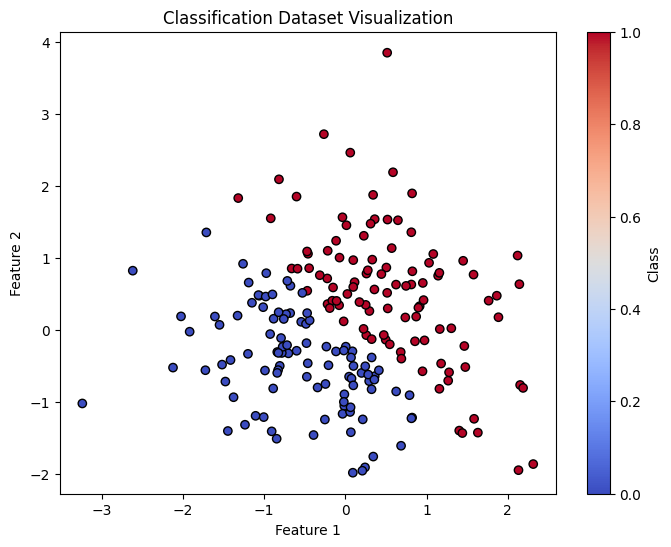

In [3]:
# Scatter plot of classification data
plt.figure(figsize=(8, 6))
plt.scatter(X_class[:, 0], X_class[:, 1], c=Y_class, cmap='coolwarm', edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Classification Dataset Visualization')
plt.colorbar(label='Class')
plt.show()

## 5. Splitting Data into Training and Testing Sets

In [4]:
# Splitting dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X_class, Y_class, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((160, 2), (40, 2))

## 6. Training a Simple Classification Model
We'll use k-Nearest Neighbors (k-NN) for this example.

In [5]:
# Training the k-NN classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=3)

## 7. Making Predictions and Evaluating the Model

In [6]:
# Predictions
Y_pred = knn.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(Y_test, Y_pred)
conf_matrix = confusion_matrix(Y_test, Y_pred)
report = classification_report(Y_test, Y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('\nConfusion Matrix:\n', conf_matrix)
print('\nClassification Report:\n', report)

Accuracy: 1.00

Confusion Matrix:
 [[21  0]
 [ 0 19]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00        19

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



## 8. Visualizing the Decision Boundary
Let's plot the decision boundary of our k-NN classifier.

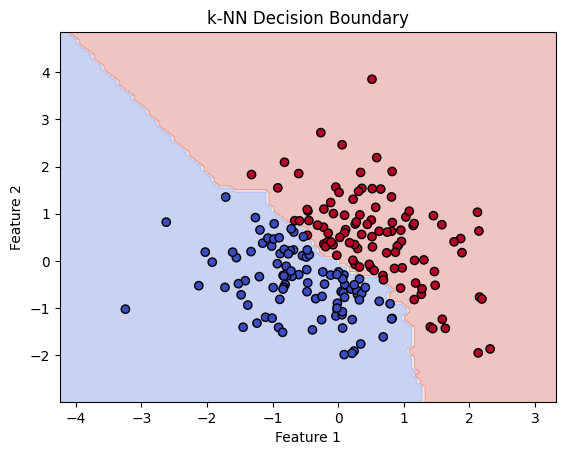

In [7]:
# Function to plot decision boundary
def plot_decision_boundary(model, X, Y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
    plt.scatter(X[:, 0], X[:, 1], c=Y, cmap='coolwarm', edgecolors='k')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('k-NN Decision Boundary')
    plt.show()

# Plot decision boundary
plot_decision_boundary(knn, X_class, Y_class)